### Module 6 : Demo 6 : Optimization

Using cpu device
2.3046090602874756
2.3010025024414062
2.296967029571533
2.299776315689087
2.295862913131714
2.2969131469726562
2.3013787269592285
2.301278829574585
2.300346612930298
2.296445846557617
2.287529230117798
2.2901809215545654
2.2937700748443604
2.2934629917144775
2.283060073852539
2.2878458499908447
2.2815117835998535
2.2935235500335693
2.276085376739502
2.2962327003479004
2.290332078933716
2.2837746143341064
2.2896041870117188
2.282937526702881
2.289273500442505
2.2840487957000732
2.2800920009613037
2.2770519256591797
2.2850301265716553
2.2779927253723145
2.277514696121216
2.275408983230591
2.2741384506225586
2.2641055583953857
2.273852586746216
2.2682600021362305
2.2664363384246826
2.2700154781341553
2.2663071155548096
2.2554209232330322
2.254389762878418
2.2700674533843994
2.2653744220733643
2.2559940814971924
2.251831293106079
2.2476696968078613
2.2404370307922363
2.23996639251709
2.2603037357330322
2.2415943145751953
2.225395679473877
2.2500648498535156
2.2359488010406

0.22210635244846344
0.3068620264530182
0.2758455276489258
0.16977129876613617
0.2389194220304489
0.24254737794399261
0.2924707531929016
0.2894304394721985
0.44646820425987244
0.37016570568084717
0.2487821877002716
0.21187300980091095
0.24626696109771729
0.38035616278648376
0.4589824676513672
0.46707749366760254
0.27505192160606384
0.4681483507156372
0.3458813428878784
0.14727087318897247
0.4455961287021637
0.2753879427909851
0.44367846846580505
0.4264596700668335
0.18250581622123718
0.269882470369339
0.40072065591812134
0.58905428647995
0.2233801931142807
0.19154317677021027
0.2181192934513092
0.3501746356487274
0.5592584609985352
0.3253629803657532
0.19513438642024994
0.42906051874160767
0.2524629235267639
0.18068808317184448
0.3049613833427429
0.291103333234787
0.4849911630153656
0.15283070504665375
0.36702367663383484
0.23399050533771515
0.29756125807762146
0.4683617353439331
0.4380131959915161
0.37774574756622314
0.3043443262577057
0.34126582741737366
0.35908451676368713
0.35178321

0.21695512533187866
0.12800008058547974
0.40812256932258606
0.31064334511756897
0.2876511812210083
0.1193690225481987
0.17620965838432312
0.26031550765037537
0.23708663880825043
0.30037981271743774
0.2827185094356537
0.31936654448509216
0.18759702146053314
0.2219952493906021
0.22864218056201935
0.12069608271121979
0.34727904200553894
0.17940470576286316
0.1444050520658493
0.26382312178611755
0.2129455953836441
0.1429954320192337
0.19079609215259552
0.3129536509513855
0.18314552307128906
0.10542284697294235
0.17974242568016052
0.19910219311714172
0.27296125888824463
0.40467703342437744
0.33764150738716125
0.1874503493309021
0.06932605057954788
0.12923748791217804
0.11285950988531113
0.2248137891292572
0.2753654718399048
0.11301583051681519
0.12390542775392532
0.199091836810112
0.2749461531639099
0.24738085269927979
0.3097817599773407
0.3965069353580475
0.1462043821811676
0.17803314328193665
0.0943252295255661
0.23518989980220795
0.09688030928373337
0.13949204981327057
0.2327959537506103

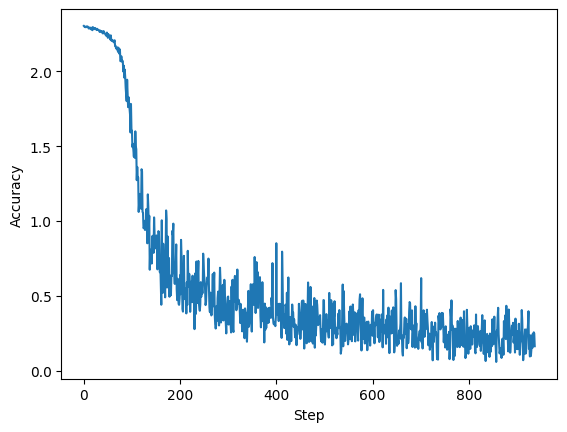

In [2]:
import torch
from torchvision.datasets import mnist
from torch.utils.data import DataLoader
import numpy as np
import torch.nn.functional as F
from torch import nn
import matplotlib.pyplot as plt

# Get cpu or gpu device for training.-------------
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

## normalize(change numpy) , reshape(784 ,),change back to tensor for DataLoader
def data_transform(x):   
    x = np.array(x, dtype = 'float32') / 255
    x = x.reshape((-1, )) 
    x = torch.from_numpy(x)
    return x
 
trainset = mnist.MNIST('./dataset/mnist', train=True, transform=data_transform, download=True)
testset = mnist.MNIST('./dataset/mnist', train = False, transform=data_transform, download=True)

# DataLoader for data , can batch & shuffle ,train_data & test_data 可以直接迭代(betch)
train_data = DataLoader(trainset, batch_size=64, shuffle=True)
test_data = DataLoader(testset, batch_size=128, shuffle=False)

class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 500)
        self.fc2 = nn.Linear(500, 250)
        self.fc3 = nn.Linear(250, 125)
        self.fc4 = nn.Linear(125, 10)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x
    
# build model
model = DNN().to(device)
# define loss function
criterion = nn.CrossEntropyLoss()
# optimization
optimizer = torch.optim.SGD(model.parameters(), 0.1)# 0.1 = learning rate = 梯度下降法的step
#optimizer = torch.optim.RMSprop(model.parameters(), 0.01, alpha=0.9)
#optimizer = torch.optim.Adam(model.parameters(), 0.01, betas=(0.9, 0.99))
losses = []
for epoch in range(1):
    model.train() # use train 模式
    # im is x(image)，label is y(answer) for 一次輸入 betch=64 筆data'
    for im, label in train_data:  
        # .to(device) : image & label 丟到CPU or GPU
        im = im.to(device) 
        label = label.to(device)
        pred = model(im) # get 64 個預測向量
        loss = criterion(pred, label)  # 將預測向量 & 期望向量輸入 loss function
        # zero the parameter gradients: 清空優化器
        optimizer.zero_grad()    
        loss.backward() # loss 做微分
        optimizer.step() 
        print(loss.item())  #更新參數
        losses.append(loss.item())
plt.xlabel('Step')        
plt.ylabel('Accuracy')
plt.plot(losses)
plt.show()